<a href="https://colab.research.google.com/github/Laura-VFA/MachineLearning-21-22/blob/main/ML_Deliverable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML2021 - Assesment Work (Regression)

The challenge is to predict Workers Compensation claims using realistic data.

**Model Evaluation**: MSE, $R^2$, ...

## Data Loading 




1. Download the train data

In [1]:
!wget https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv

--2022-01-19 09:54:27--  https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv [following]
--2022-01-19 09:54:28--  https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv.6’

train.csv.6         100%[===================>]   4.71M  --.-KB/s    in 0.09s   

2022-01-19 09:54:28 (51.5 MB/s) - ‘train.csv.6’ saved [4942050/4942050]



In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


The training set containing 30,000 insurance policies that you can use to train your model.

**Data fields**

-  ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
- **UltimateIncurredClaimCost**: Total claims payments by the insurance company. This is the field you are asked to predict in the test set.

In [3]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [4]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


## Preprocessing

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, ...



### Missing Values

It is necessary to address the missing values to improve the quality of the data that will be used to generate the models. 

In [5]:
df.shape

(36176, 15)

In [6]:
pd.isnull(df).any()

ClaimNumber                  False
DateTimeOfAccident           False
DateReported                 False
Age                          False
Gender                       False
MaritalStatus                 True
DependentChildren            False
DependentsOther              False
WeeklyWages                   True
PartTimeFullTime             False
HoursWorkedPerWeek            True
DaysWorkedPerWeek            False
ClaimDescription             False
InitialIncurredCalimsCost    False
UltimateIncurredClaimCost    False
dtype: bool

In [7]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [8]:
df.shape

(36049, 15)

### OneHotEncoding 

[OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [9]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])
df_OneHot

,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
36171,1,0,0,0,1,0,1,0
36172,0,1,0,1,0,0,1,0
36173,1,0,0,1,0,0,0,1
36174,0,1,0,1,0,0,1,0


> At the begining only the numerical and the encoded features must be considered.

> At the end of the work you can include text, date information and so on.

In [10]:
df_full = pd.concat([df, df_OneHot], axis = 1)
df_full.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0


### Train and test split

In [11]:
x_features = ['WeeklyWages', 'HoursWorkedPerWeek', 'InitialIncurredCalimsCost']


In [12]:
from sklearn.model_selection import train_test_split
X = df[x_features]
y = df['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


## Basic Modeling 

We’ll be exploring Linear Regression using scikit-learn in python.

We will use the selected features to predict the results. 

Linear regression produces a model in the form:


 $$
 Y_{t}=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon
 $$

The way this is accomplished is by minimising the residual sum of squares, given by the equation below:
$$
RSS=Σni=1(yi–y^i)2
$$

$$
RSS=Σni=1(yi–β0^–β1^x1–β2^x2–…–βp^xp)
$$


Scikit-learn provides a LinearRegression function for doing this job.
Linear Regression (Dummy Model)

In [13]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, which is an array of tuples of coefficients.

In [14]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for WeeklyWages is 9.794779343746388
The coefficient for HoursWorkedPerWeek is -25.675661234818307
The coefficient for InitialIncurredCalimsCost is 0.7743349854415342


Note that, because we’ve not done any feature scaling or dimensionality reduction, we can’t say anything about the relative importance of each of our features given these coefficients because the features are not of the same scale.

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))


MAE: 7979.755264779615
MAPE: 0.8024366465210745
MSE: 547594288.9830517
R^2: -1.5990659116870134


# 1. BaseLine (kNN or DecisionTrees)

- Feature Selection
- CrossValidation 
   - kNN: k, weights, metric (manhattan, euclidean)
   - Decisiontrees: max_depth


In [17]:
# Seleccion de caracteristicas 
# (quitar features redundantes (genero y demas por el onehot))
df_not_categ = df_full.drop(labels=['Gender', 'MaritalStatus', 'PartTimeFullTime'], axis=1)

# (quitar fechas y descripcion)
df_numeric = df_not_categ.drop(labels=['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'ClaimDescription'], axis=1)

df_numeric.head()


,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,48,0,0,500.00,38.0,5,1500,4748.203388,0,1,0,1,0,0,1,0
1,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,0,1,0,0,1,0
2,30,0,0,709.10,38.0,5,1700,2293.949087,0,1,0,0,0,1,1,0
3,41,0,0,555.46,38.0,5,15000,17786.487170,0,1,0,0,1,0,1,0
4,36,0,0,377.10,38.0,5,2800,4014.002925,0,1,0,1,0,0,1,0


## 1.1 kNN


### All features

In [18]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = list(df_numeric.columns)
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
31176,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
6160,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
10343,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
7946,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
14237,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


In [19]:
# rest index avoid problems in cross validation
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
1,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
2,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
3,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
4,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


Min Value uniform : 7817.362429688228 (20)
Min Value distance : 7968.080735108606 (20)


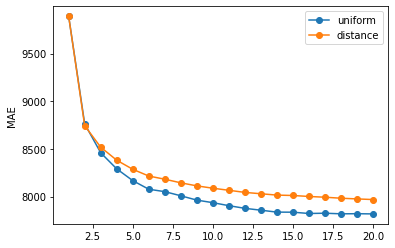

In [20]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = True, random_state=0) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,100, 5):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          knn.fit( X = fx_train, y = fy_train)
          y_pred = knn.predict(X = fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [21]:
# constructor
n_neighbors = 20*5
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)


from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7371.971451146303
MAPE: 0.8337102568836533
MSE: 499331400.72438633
R^2: -0.9894994692616192


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


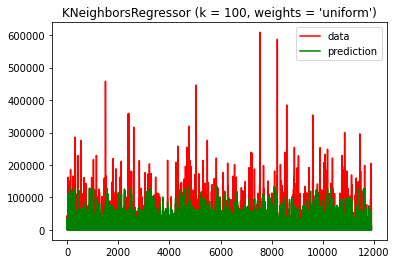

In [22]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

### Top 4 + Inicial y predecir final

In [23]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
31176,1,0,634.00,5,10000
6160,1,0,422.70,5,3000
10343,0,0,761.97,5,50000
7946,0,0,200.00,5,650
14237,0,0,865.38,5,3250


Min Value uniform : 7830.587307934596 (13)
Min Value distance : 8199.893299012452 (13)


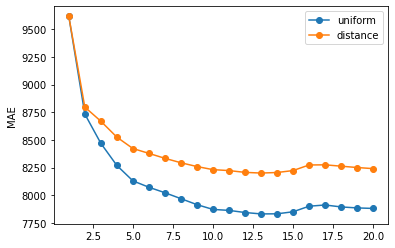

In [24]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0) #
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html 


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,100, 5):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          knn.fit( X = fx_train, y = fy_train)
          y_pred = knn.predict(X = fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [25]:
# constructor
n_neighbors = 13*5
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)


from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7383.814836424843
MAPE: 0.8398482974409722
MSE: 503557935.9280506
R^2: -0.8941992234295102


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


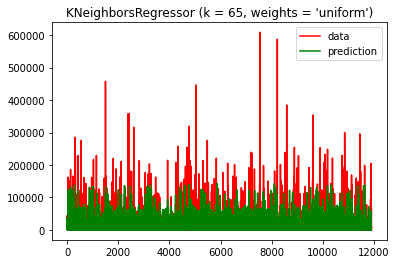

In [26]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## 1.2 DecisionTrees

### All features

In [27]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = list(df_numeric.columns)
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
31176,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
6160,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
10343,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
7946,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
14237,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


No handles with labels found to put in legend.


Min Value : 7927.09426834388 (3)


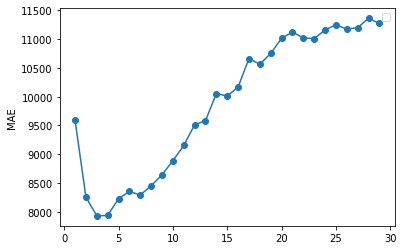

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import tree

cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [29]:
from sklearn import tree
depth = 3
regr = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=3, random_state=0)

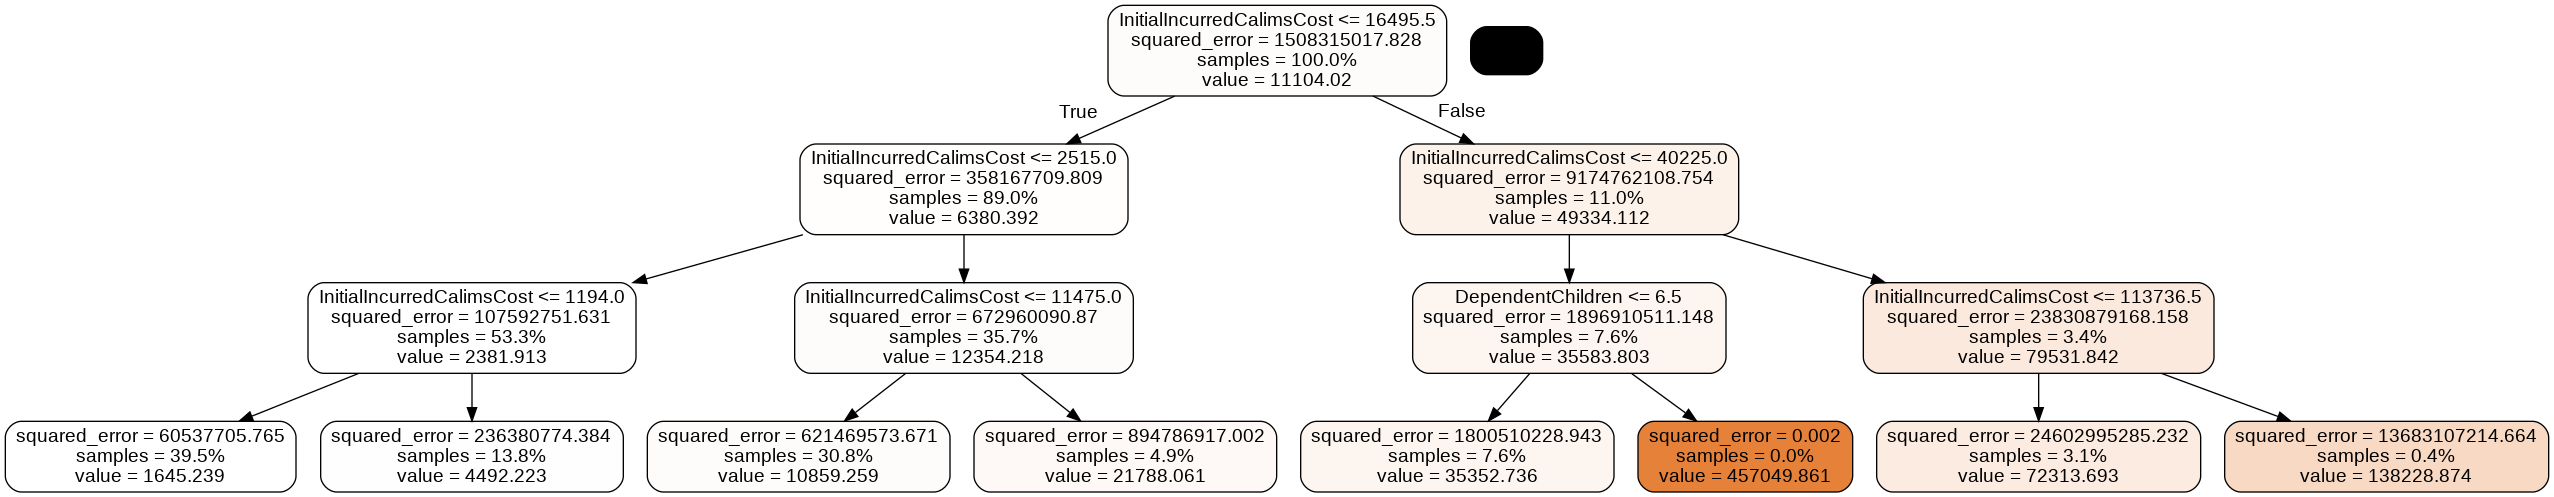

In [30]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=x_features, 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [31]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.00000
1,DependentChildren,0.02673
2,DependentsOther,0.00000
3,WeeklyWages,0.00000
4,HoursWorkedPerWeek,0.00000
5,DaysWorkedPerWeek,0.00000
6,InitialIncurredCalimsCost,0.97327
7,Gender_F,0.00000
8,Gender_M,0.00000
9,Gender_U,0.00000


In [32]:
y_pred = regr.predict(X_test)

In [33]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7461.997334426615
MAPE: 0.7992234835852662
MSE: 499742094.625019
R^2: -0.9051551091347927


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


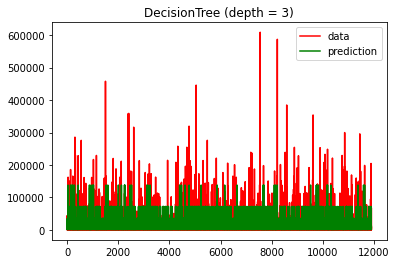

In [34]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree (depth = %i)" % (depth))

plt.show()

### Prueba a predecir el inicial en lugar del final

In [35]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = list(df_numeric.columns)
x_features.remove('InitialIncurredCalimsCost')
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['InitialIncurredCalimsCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
31176,37,0,0,634.00,38.0,5,0,1,0,0,1,0,1,0
6160,26,0,0,422.70,24.2,5,0,1,0,0,1,0,1,0
10343,52,0,0,761.97,38.0,5,0,1,0,1,0,0,1,0
7946,33,0,0,200.00,38.0,5,1,0,0,1,0,0,1,0
14237,42,0,0,865.38,38.0,5,0,1,0,1,0,0,1,0


No handles with labels found to put in legend.


Min Value : 7972.310713042233 (5)


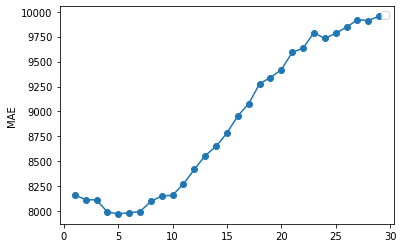

In [36]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [37]:
from sklearn import tree
depth = 5
regr = tree.DecisionTreeRegressor(max_depth =depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=5, random_state=0)

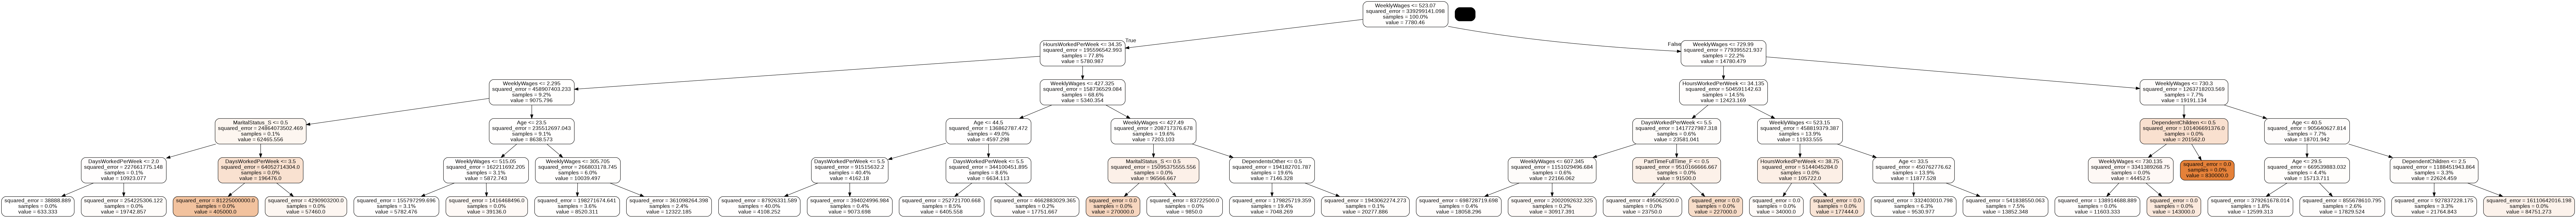

In [38]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=x_features, 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [39]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.036615
1,DependentChildren,0.310212
2,DependentsOther,0.003514
3,WeeklyWages,0.405872
4,HoursWorkedPerWeek,0.032752
5,DaysWorkedPerWeek,0.097177
6,Gender_F,0.000000
7,Gender_M,0.000000
8,Gender_U,0.000000
9,MaritalStatus_M,0.000000


In [40]:
y_pred = regr.predict(X_test)

In [41]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7883.082335753751
MAPE: 1.0176417258838775
MSE: 361874919.70842
R^2: -3.10904818640381


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


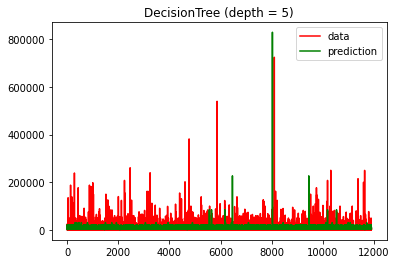

In [42]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree (depth = %i)" % (depth))

plt.show()

### Prueba a quedarse con el top 4 y predecir el inicial

In [43]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek']

X = df_numeric[x_features]
y = df_numeric['InitialIncurredCalimsCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek
31176,1,0,634.00,5
6160,1,0,422.70,5
10343,0,0,761.97,5
7946,0,0,200.00,5
14237,0,0,865.38,5


No handles with labels found to put in legend.


Min Value : 8048.401166075523 (4)


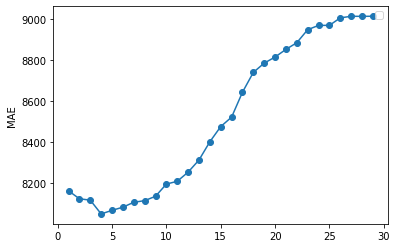

In [44]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [45]:
from sklearn import tree
depth = 4
regr = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=4, random_state=0)

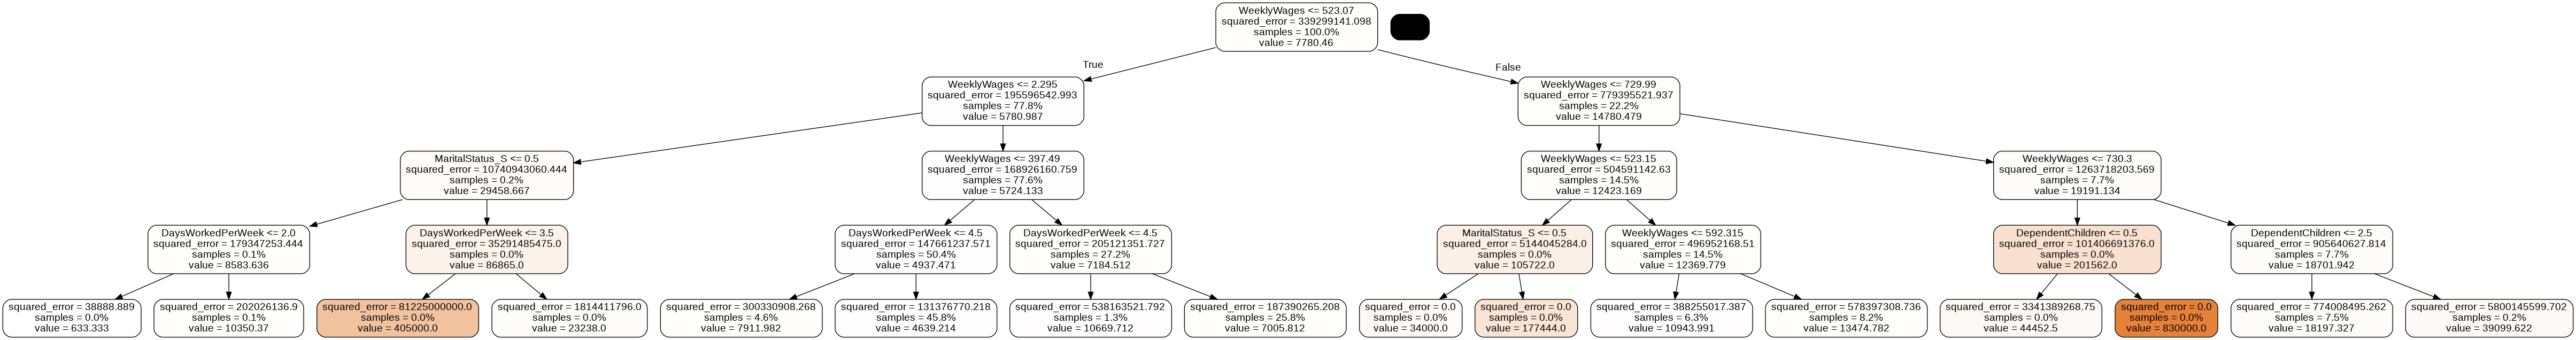

In [46]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=x_features, 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [47]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,MaritalStatus_S,0.043813
1,DependentChildren,0.349917
2,WeeklyWages,0.430062
3,DaysWorkedPerWeek,0.176208


In [48]:
y_pred = regr.predict(X_test)

In [49]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7986.3193192541485
MAPE: 1.0300275587695031
MSE: 356944410.70831525
R^2: -3.708898774863255


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


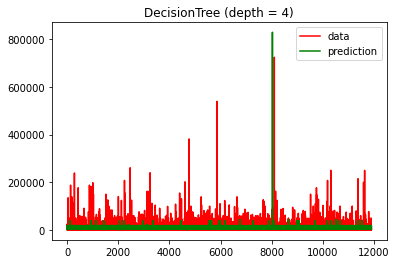

In [50]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree (depth = %i)" % (depth))

plt.show()

### Prueba a quedarse con top4 + inicial y predecir el final

In [51]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
31176,1,0,634.00,5,10000
6160,1,0,422.70,5,3000
10343,0,0,761.97,5,50000
7946,0,0,200.00,5,650
14237,0,0,865.38,5,3250


No handles with labels found to put in legend.


Min Value : 7914.081370797554 (6)


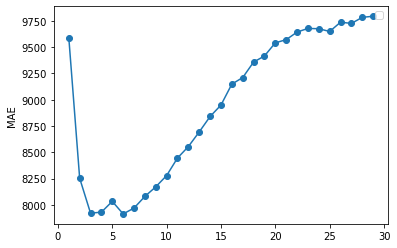

In [52]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [53]:
from sklearn import tree
depth = 6
regr = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=6, random_state=0)

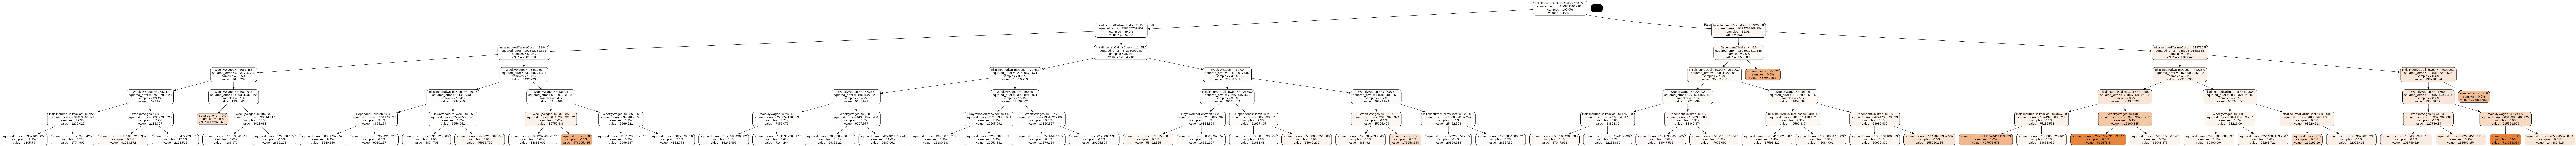

In [54]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=x_features, 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [55]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,MaritalStatus_S,0.00000
1,DependentChildren,0.02291
2,WeeklyWages,0.21042
3,DaysWorkedPerWeek,0.00138
4,InitialIncurredCalimsCost,0.76529


In [56]:
y_pred = regr.predict(X_test)

In [57]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7430.652164513954
MAPE: 0.7964791577566792
MSE: 588133713.2792689
R^2: -0.6820461738741506


# 2. Optimized Model

## 2.1 RandomForest

In [ ]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Age,DependentChildren,WeeklyWages,HoursWorkedPerWeek,InitialIncurredCalimsCost
31176,37,0,634.00,38.0,10000
6160,26,0,422.70,24.2,3000
10343,52,0,761.97,38.0,50000
7946,33,0,200.00,38.0,650
14237,42,0,865.38,38.0,3250


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 20, max_depth = 5, criterion='absolute_error', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  5533.708355618152


In [ ]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 5533.708355618152
MAPE: 1.1353616621560265
MSE: 524769337.9576389
R^2: -3.1661645610610174


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


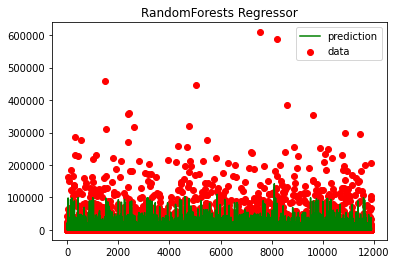

In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.005311
1,DependentChildren,0.005460
2,WeeklyWages,0.022839
3,HoursWorkedPerWeek,0.002837
4,InitialIncurredCalimsCost,0.963552


## 2.2 Boosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit regression model
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'))
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#
#regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'),
#                          n_estimators=30, random_state=42))
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py                         
regressors.append(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=4, random_state=0, loss='ls'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


Error Measure 5603.84951353113


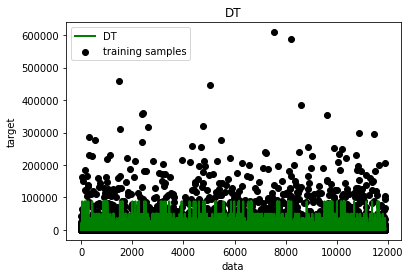

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Error Measure 7794.125381780473


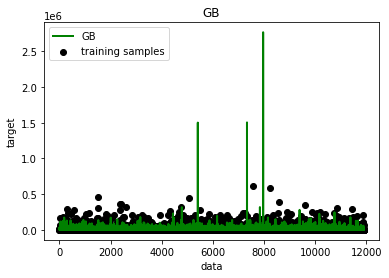

In [ ]:
xx = np.stack(i for i in range(len(y_test)))
#regr_names = ["DT", "AB", "GB"]
regr_names = ["DT", "GB"]
               
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print ("Error Measure", mean_absolute_error(y_test,y))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_test, c="k", label="training samples")
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()


In [ ]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree':regressors[0].feature_importances_, 
              #'AdaBoostRegressor': regressors[1].feature_importances_,
              'GradientBoostingRegressor': regressors[2].feature_importances_, })

## 2.3 Hyperparameter Optimization

In [ ]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### 2.3.2 RandomForest Hyper Opt

#### Con las top 4 + inicial

In [ ]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

In [ ]:
regressor = RandomForestRegressor(random_state=0)


In [ ]:
from scipy.stats import randint as sp_randint
param_dist = {"n_estimators": [8, 16], # Number of trees in random forest
              #"max_features": ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
              "max_depth": [6, 5, 4], # Maximum number of levels in tree
              #"min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              #"min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              #"bootstrap": [True, False], # Method of selecting samples for training each tree
              #"criterion": ["squared_error", "absolute_error"] #mse, mae
              "criterion": ["absolute_error"] #mse, mae
              #"min_weight_fraction_leaf": 
              #"max_leaf_nodes"
              #"min_impurity_decrease"
              #"ccp_alpha"
              }

In [ ]:
from sklearn.model_selection import GridSearchCV
rnd_regres = GridSearchCV(estimator = regressor, param_grid = param_dist, cv = 5)

# Fit the random search model
rnd_regres.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [6, 5, 4],
                                        'n_estimators': [4, 8, 16, 32, 64]},
                   random_state=0)

In [ ]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.228 (std: 0.094)
Parameters: {'n_estimators': 16, 'max_depth': 5, 'criterion': 'absolute_error'}

Model with rank: 2
Mean validation score: 0.227 (std: 0.096)
Parameters: {'n_estimators': 16, 'max_depth': 6, 'criterion': 'absolute_error'}

Model with rank: 3
Mean validation score: 0.226 (std: 0.091)
Parameters: {'n_estimators': 32, 'max_depth': 4, 'criterion': 'squared_error'}

Model with rank: 4
Mean validation score: 0.226 (std: 0.094)
Parameters: {'n_estimators': 64, 'max_depth': 5, 'criterion': 'absolute_error'}

Model with rank: 5
Mean validation score: 0.224 (std: 0.091)
Parameters: {'n_estimators': 32, 'max_depth': 4, 'criterion': 'absolute_error'}



In [ ]:
rnd_regres.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 16}

In [ ]:
pd.isnull(y_pred).any()

True

In [ ]:
# choose the best

best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = X_train, y =y_train)
y_pred = best_random.predict(X = X_test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)

MAE 5523.058866331718


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


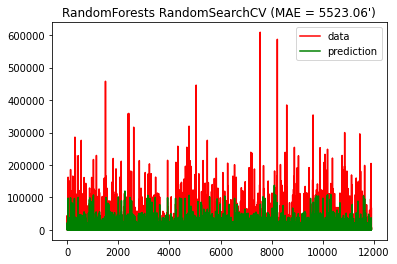

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,Age,0.006447
1,DependentChildren,0.008435
2,WeeklyWages,0.021964
3,HoursWorkedPerWeek,0.003055
4,InitialIncurredCalimsCost,0.960099


#### Con todas

In [ ]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
x_features = list(df_numeric.columns)
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
31176,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
6160,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
10343,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
7946,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
14237,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


In [ ]:
regressor = RandomForestRegressor( random_state=0)

In [ ]:
from scipy.stats import randint as sp_randint
param_dist = {"n_estimators": [8, 16], # Number of trees in random forest
              #"max_features": ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
              "max_depth": [6, 5, 4], # Maximum number of levels in tree
              #"min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              #"min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              #"bootstrap": [True, False], # Method of selecting samples for training each tree
              #"criterion": ["squared_error", "absolute_error"] #mse, mae
              "criterion": ["absolute_error"] #mse, mae
              #"min_weight_fraction_leaf": 
              #"max_leaf_nodes"
              #"min_impurity_decrease"
              #"ccp_alpha"
              }

In [ ]:
from sklearn.model_selection import GridSearchCV
rnd_regres = GridSearchCV(estimator = regressor, param_grid=param_dist, cv = 5, verbose=4)

# Fit the random search model
rnd_regres.fit(X = X_train, y = y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=absolute_error, max_depth=6, n_estimators=8;, score=0.227 total time=  43.2s
[CV 2/5] END criterion=absolute_error, max_depth=6, n_estimators=8;, score=0.258 total time=  42.9s
[CV 3/5] END criterion=absolute_error, max_depth=6, n_estimators=8;, score=0.349 total time=  43.0s
[CV 4/5] END criterion=absolute_error, max_depth=6, n_estimators=8;, score=0.055 total time=  43.1s
[CV 5/5] END criterion=absolute_error, max_depth=6, n_estimators=8;, score=0.253 total time=  42.9s
[CV 1/5] END criterion=absolute_error, max_depth=6, n_estimators=16;, score=0.241 total time= 1.4min


KeyboardInterrupt: ignored

In [ ]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.207 (std: 0.078)
Parameters: {'max_depth': 4, 'n_estimators': 8}

Model with rank: 2
Mean validation score: 0.189 (std: 0.091)
Parameters: {'max_depth': 4, 'n_estimators': 64}

Model with rank: 3
Mean validation score: 0.184 (std: 0.103)
Parameters: {'max_depth': 4, 'n_estimators': 32}

Model with rank: 4
Mean validation score: 0.098 (std: 0.217)
Parameters: {'max_depth': 4, 'n_estimators': 16}

Model with rank: 5
Mean validation score: 0.086 (std: 0.077)
Parameters: {'max_depth': 5, 'n_estimators': 64}



In [ ]:
rnd_regres.best_params_

{'max_depth': 4, 'n_estimators': 8}

In [ ]:
# choose the best

best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = X_train, y =y_train)
y_pred = best_random.predict(X = X_test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)

MAE 7376.336582857585


In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Random Forests': best_random.feature_importances_})

###  2.3.2 Boosting (el mejó)

In [ ]:
regressor = regressors[0]

In [ ]:
# LO APLICAMOS AL DT DE BOOSTING
from scipy.stats import randint as sp_randint
param_dist = {#"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              #"bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_error", "absolute_error"] #mse, mae
              #"min_weight_fraction_leaf": 
              #"max_leaf_nodes"
              #"min_impurity_decrease"
              #"ccp_alpha"
              }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 30, cv = 5, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                   max_depth=4),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f630846cc50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f630753c610>},
                   random_state=0)

In [ ]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.228 (std: 0.094)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 24, 'min_samples_split': 37}

Model with rank: 2
Mean validation score: 0.223 (std: 0.094)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 32, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.223 (std: 0.091)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 32, 'min_samples_split': 7}

Model with rank: 4
Mean validation score: 0.220 (std: 0.088)
Parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 43, 'min_samples_split': 15}

Model with rank: 5
Mean validation score: 0.219 (std: 0.093)
Parameters: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 16, 'min_samples_split': 49}



In [ ]:
rnd_regres.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 24,
 'min_samples_split': 37}

In [ ]:
# choose the best

best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit( X = X_train, y =y_train)
y_pred = best_random.predict(X = X_test)

# EVALUATE 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print ('MAE', mae)

MAE 5544.937485259065


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


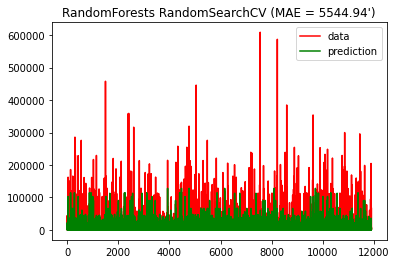

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,Age,0.013984
1,DependentChildren,0.000731
2,WeeklyWages,0.032614
3,HoursWorkedPerWeek,0.001590
4,InitialIncurredCalimsCost,0.951081


# 3. Improvements (Include text data, other changes)

In [ ]:
# Vectorizar la caraacteeristica de texto y luego mergear ambos dataframes
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#!pip install nltk
import nltk
nltk.download("punkt") 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#borrar stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stopwords = set(stopwords.words("english"))
stopwords.add('left')
stopwords.add('right')

df_full['words_tokenized'] = [word_tokenize(comment) for comment in df_full['ClaimDescription']]

df_full['words_tokenized'] = [[w for w in comment if w.lower() not in stopwords] for comment in df_full['words_tokenized']]
df_full['words_tokenized']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0              [LIFTING, TYRE, INJURY, ARM, WRIST, INJURY]
1        [STEPPED, AROUND, CRATES, TRUCK, TRAY, FRACTUR...
2                           [CUT, SHARP, EDGE, CUT, THUMB]
3              [DIGGING, LOWER, BACK, LOWER, BACK, STRAIN]
4        [REACHING, SHOULDER, LEVEL, ACUTE, MUSCLE, STR...
                               ...                        
36171                  [WALKED, DOOR, BRUISED, KNEE, PAIN]
36172             [LIFTING, HOT, WATER, TRAY, BURN, WRIST]
36173          [REMOVING, BROKEN, GLASS, LACERATED, THUMB]
36174                [FELL, SPRAINED, ANKLE, KNEE, INJURY]
36175             [LIFTING, METAL, CYLINDER, STRAIN, NECK]
Name: words_tokenized, Length: 36049, dtype: object

In [ ]:
df_full['words_tokenized'] = [' '.join(comment) for comment in df_full['words_tokenized']]
df_full['words_tokenized']

0                     LIFTING TYRE INJURY ARM WRIST INJURY
1        STEPPED AROUND CRATES TRUCK TRAY FRACTURE FOREARM
2                                 CUT SHARP EDGE CUT THUMB
3                     DIGGING LOWER BACK LOWER BACK STRAIN
4        REACHING SHOULDER LEVEL ACUTE MUSCLE STRAIN SI...
                               ...                        
36171                        WALKED DOOR BRUISED KNEE PAIN
36172                    LIFTING HOT WATER TRAY BURN WRIST
36173                REMOVING BROKEN GLASS LACERATED THUMB
36174                      FELL SPRAINED ANKLE KNEE INJURY
36175                   LIFTING METAL CYLINDER STRAIN NECK
Name: words_tokenized, Length: 36049, dtype: object

In [ ]:
vectorizer_ngrams = TfidfVectorizer(ngram_range=(1,3), max_features=200)

# Fit and transform
data_ngrams = vectorizer_ngrams.fit_transform(df_full['words_tokenized'])
print("vocabulary: ", vectorizer_ngrams.vocabulary_)


vocabulary:  {'lifting': 102, 'injury': 80, 'arm': 5, 'wrist': 199, 'truck': 184, 'fracture': 61, 'forearm': 57, 'cut': 34, 'thumb': 177, 'lower': 107, 'back': 6, 'strain': 153, 'lower back': 108, 'back lower': 8, 'back strain': 11, 'back lower back': 9, 'lower back strain': 110, 'shoulder': 137, 'muscle': 119, 'struck': 167, 'head': 72, 'lacerated': 88, 'finger': 52, 'bruised': 22, 'cleaning': 29, 'hand': 70, 'slipped': 140, 'little': 105, 'little finger': 106, 'dust': 40, 'abrasion': 0, 'eye': 42, 'strained': 161, 'pain': 124, 'back strained': 13, 'strained lower': 163, 'back pain': 10, 'strained lower back': 164, 'lower back pain': 109, 'leg': 101, 'knee': 82, 'timber': 178, 'foreign': 58, 'body': 16, 'foreign body': 59, 'body eye': 17, 'foreign body eye': 60, 'fall': 46, 'ladder': 100, 'strain shoulder': 159, 'hot': 76, 'burn': 25, 'onto': 123, 'laceration': 93, 'middle': 113, 'laceration hand': 94, 'middle finger': 114, 'cutting': 37, 'cut finger': 35, 'whilst': 196, 'using': 190,

In [ ]:
# Create a Dataframe
cv_tfidf_ngrams=pd.DataFrame(data_ngrams.toarray(),columns=vectorizer_ngrams.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_numeric.shape

(36049, 16)

In [ ]:
df_numeric.reset_index(inplace=True, drop=True)

In [ ]:
# Mergear ambos dataframes
aux = df_numeric.join(cv_tfidf_ngrams)

In [ ]:
# APLICAR MODELOOOOOOOOOS

In [ ]:
# Definicion de train set y test set
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_regression
x_features = list(aux.columns)
x_features.remove('UltimateIncurredClaimCost')

X = aux[x_features]
y = aux['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P,abrasion,accident,air,air hose,ankle,arm,back,back injury,back lower,back lower back,back pain,back strain,back strain lower,back strained,bending,bite,body,body eye,body eye foreign,box,boxes,broken,bruised,bruised foot,bruising,...,strain shoulder strain,strained,strained back,strained lower,strained lower back,strained shoulder,stress,struck,struck falling,struck knife,struck knife lacerated,struck metal,synovitis,tendon,tendon synovitis,tendonitis,tendonitis shoulder,thumb,timber,tissue,tissue injury,toe,tripped,trolley,truck,twisted,twisted knee,unknown,upper,upper back,using,vehicle,vehicle accident,welding,wet,wet floor,whilst,work,wound,wrist
31051,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.375203,0.0,0.0,0.0,0.0,0.361445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
6088,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.466941
10269,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
7872,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.329958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.455859,0.000000
14159,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 10, max_depth = 5, criterion='absolute_error', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  6021.746861886077


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import tree

total_scores = []
for i in range(5,10): #OJO CUIDAO QUE AQUI HE SUBIDO EL N-ESTIMATOR
       regr = RandomForestRegressor(n_estimators= 30, max_depth = 5, criterion='absolute_error', random_state=0)
       # entrenamiento y ejecución del modelo
       regr.fit(X_train, y_train)
       y_pred = regr.predict(X_test)
       # evaluación del modelo
       mae = mean_absolute_error(y_test, y_pred)
       total_scores.append(mae)
      
      
plt.plot(range(3,10), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1 + 2) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [ ]:
depth = 5
regr = RandomForestRegressor(n_estimators= 4, max_depth = depth, criterion='absolute_error', random_state=0)
# entrenamiento y ejecución del modelo
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 5843.938250117228
MAPE: 1.084294946701515
MSE: 615818489.3102803
R^2: -1.648826925970861


In [ ]:
#plt.subplot(2, 1, i + 1)
# x axis for plotting
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regressor.feature_importances_})